In [44]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки
%matplotlib inline
plt.style.use('seaborn')

<ipython-input-44-fb2ecfe134f3>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [45]:
# Подключаем облако к данным
# from google.colab import drive
# drive.mount('/content/drive')

### Анализ требований
**Анализ данных**


In [46]:
# Загружаем данные
data = pd.read_csv('/content/drive/MyDrive/Files/module4/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Итак, набор данных содержит следующие столбцы:

* age — возраст страхователя;
* sex — пол;
* bmi — индекс массы тела (кг/м^2), в идеале — от 18.5 до 24.9;
* children — количество детей, охваченных медицинской страховкой;
* smoker — является ли человек курящим;
* region — район проживания в США (северо-восток, юго-восток, северо-запад, юго-запад);
* charges (целевой признак) — индивидуальные медицинские расходы, оплачиваемые медицинской страховкой.

__Узнаем размер таблицы__

In [47]:
print(data.shape)

(1338, 7)


__Выводим информаицю о пропусках__

In [48]:
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

__Посмотрим на типы данных столбцов:__

In [49]:
display(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Наши данные содержат несколько типов признаков:

* age, bmi, children — числовые признаки;
* sex, smoker — бинарные категориальные переменные (две категории);
* region — множественные категориальные переменные (несколько категорий);
* charges — числовой целевой признак.

Прежде чем приступать к этапу подготовки данных для модели, вы можете произвести небольшое исследование зависимостей в данных, например построить следующие графики и диаграммы:

* гистограммы/коробчатые диаграммы числовых признаков;
* столбчатые диаграммы медианных медицинских расходов в зависимости от категориальных признаков;
* диаграммы рассеяния зависимости целевого признака от других числовых в разрезе категориальных (обратите особенное внимание на зависимость медицинских расходов от признака курения).

In [50]:
#кодируем бинарные категориальные признаки

data['smoker'] = data['smoker'].apply(lambda x: 0 if x =='no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x=='female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


Итак, мы получили перекодированную таблицу, в которой все признаки являются числовыми.

Выделим факторы и целевой признак в отдельные таблицы:

In [51]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

## Задание 6.1

Прежде чем переходить к этапу моделирования, нам необходимо позаботиться о создании выборки для тестирования модели.

Разделите набор данных на тренировочную и тестовую выборки в соотношении 80/20. Воспользуйтесь функцией train_test_split.

В качестве значения параметра random_state укажите число 42.

Чему равно количество наблюдений в тестовом наборе данных?

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Число записей в тестовом наборе данных - {}'.format(X_test.shape[0]))

Число записей в тестовом наборе данных - 268


## Задание 6.2

Обучите модель линейной регрессии аналитическим методом (LinearRegression) на тренировочном наборе данных. Все параметры оставьте по умолчанию.

Чему равен свободный член (intercept) обученной модели? Ответ округлите до сотых.

In [53]:
lr_lstat = linear_model.LinearRegression()
lr_lstat.fit(X_train, y_train)

print('Свододный член обученной модели равен - {}'.format(np.round(lr_lstat.intercept_, 2)))

Свододный член обученной модели равен - -12390.8


# Задание 6.3

С помощью модели, полученной в предыдущем задании, сделайте предсказание на тренировочной и тестовой выборке. Рассчитайте следующие три метрики: R^2, MAE, MAPE. Не забудьте привести значение  к процентам.

Значение R^2 округлите до трёх знаков после точки-разделителя, а значения MAE и MAPE — до целого числа.

Чему равны значения метрик на тренировочной и тестовой выборках?

In [60]:
y_test_predict = lr_lstat.predict(X_test)
y_train_predict = lr_lstat.predict(X_train)

print('R^2 for Test: {}'.format(np.round(metrics.r2_score(y_test, y_test_predict), 3)))
print('MAE for Test: {} $'.format(np.round(metrics.mean_absolute_error(y_test, y_test_predict))))
print('MAPE for TEST: {} %'.format(np.round(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100)))

print()

print('R^2 for Train: {}'.format(np.round(metrics.r2_score(y_train, y_train_predict), 3)))
print('MAE for Train: {} $'.format(np.round(metrics.mean_absolute_error(y_train, y_train_predict))))
print('MAPE for Train: {} %'.format(np.round(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100)))

R^2 for Test: 0.784
MAE for Test: 4181.0 $
MAPE for TEST: 47.0 %

R^2 for Train: 0.742
MAE for Train: 4208.0 $
MAPE for Train: 42.0 %


Задание 6.4

Постройте диаграмму boxplot для визуализации ошибок модели линейной регрессии на тренировочной и тестовой выборках. В качестве ошибки возьмите разницу между истинным ответом и предсказанием:  (без модуля).

Выберите верные ответы:

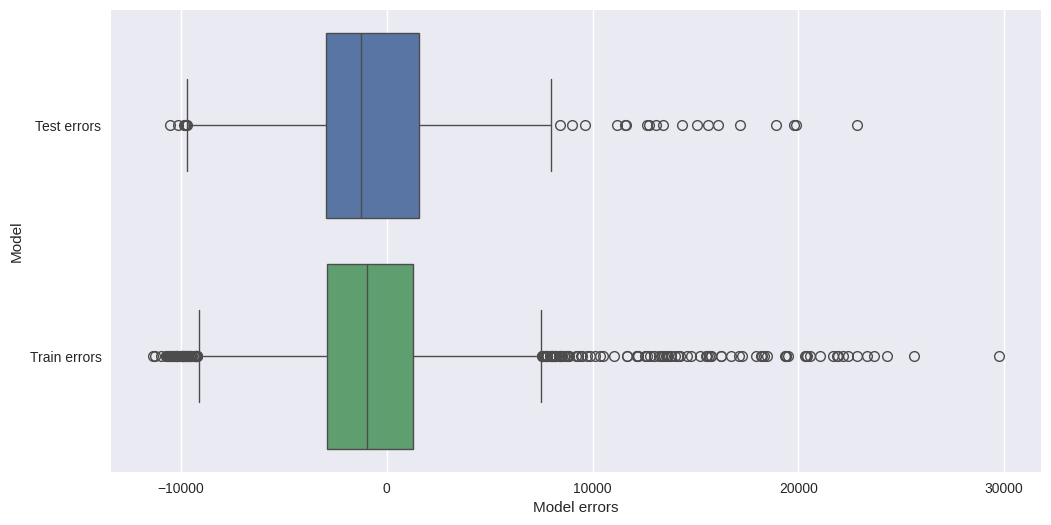

In [66]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6))  #фигура + координатная плоскость

y_errors_test = y_test - lr_lstat.predict(X_test)
y_errors_train = y_train - lr_lstat.predict(X_train)

errors_df = pd.DataFrame(
    {'Test errors': y_errors_test,
     'Train errors': y_errors_train
     }
)

sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

## Задание 6.5

Нормализуйте тренировочную и тестовую выборки с помощью min-max-нормализации (MinMaxScaler). Расчёт параметров нормализации (fit) произведите на тренировочной выборке.

Примечание. Min-max-нормализация не искажает изначальный вид бинарных категориальных признаков, в отличие от стандартизации.

На нормализованных данных сгенерируйте полиномиальные признаки степени 2. Воспользуйтесь классом PolynomialFeatures из библиотеки sklearn. Значение параметра include_bias выставите на False.

In [75]:
#Инициализируем нормализатор MinMaxScaler
scaler = preprocessing.MinMaxScaler()
#Подгоняем параметры нормализатора (вычисляем среднее и СКО)
scaler.fit(X_train)
#Производим нормализацию тренировочной выборки
X_train_scaled = scaler.transform(X_train)
#Производим нормализацию тестовой выборки
X_test_scaled = scaler.transform(X_test)

#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_scaled_poly = poly.transform(X_train_scaled)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_scaled_poly = poly.transform(X_test_scaled)

#Выводим результирующие размерности таблиц
print(X_train_scaled_poly.shape)
print(X_test_scaled_poly.shape)

(1070, 54)
(268, 54)


## Задание 6.6
Обучите модель линейной регрессии на полиномиальных признаках.

Чему равно значение метрики R^2 на тестовой выборке?

Значение R^2 округлите до трёх знаков после запятой.

In [81]:
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_scaled_poly, y_train)

y_train_predict = lr_poly.predict(X_train_scaled_poly)
y_test_predict = lr_poly.predict(X_test_scaled_poly)

def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.842
Train MAE: 2904
Train MAPE: 30


Test R^2: 0.866
Test MAE: 2745
Test MAPE: 31


## Задание 6.7

Выведите значения коэффициентов полученной модели. Посмотрите на степени коэффициентов.

Какой вывод можно сделать?

In [82]:
print(lr_poly.coef_)

[-8.13047559e+16  2.53222933e+14  1.35906410e+16 -2.70018612e+16
  3.31330832e+14  1.46523471e+15  1.05093258e+15  1.20907045e+15
  1.13655758e+15  8.38400000e+03  8.16000000e+02  9.44000000e+02
 -1.69200000e+03  1.68000000e+02  8.13047559e+16  8.13047559e+16
  8.13047559e+16  8.13047559e+16  1.24341579e+15  6.66000000e+02
 -1.26300000e+03  2.49000000e+02 -1.49663872e+15 -1.49663872e+15
 -1.49663872e+15 -1.49663872e+15 -9.71925000e+03  1.59600000e+03
  5.48352500e+04 -1.35906410e+16 -1.35906410e+16 -1.35906410e+16
 -1.35906410e+16 -2.10325000e+03 -2.24000000e+03  2.70018612e+16
  2.70018612e+16  2.70018612e+16  2.70018612e+16 -1.61696517e+14
 -1.69634315e+14 -1.69634315e+14 -1.69634315e+14 -1.69634315e+14
  9.28525306e+14  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.34282743e+15  0.00000000e+00  0.00000000e+00  1.18468957e+15
  0.00000000e+00  1.25720243e+15]


## Задание 6.8

Постройте линейную регрессию с L1-регуляризацией (Lasso) на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию, параметр max_iter установите в значение 2000.

Чему равны метрики R^2, MAE и MAPE на тестовой выборке?

In [84]:
lasso_lr_poly = linear_model.Lasso(max_iter=2000)

lasso_lr_poly.fit(X_train_scaled_poly, y_train)

y_test_predict = lasso_lr_poly.predict(X_test_scaled_poly)
y_train_predict = lasso_lr_poly.predict(X_train_scaled_poly)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.842
Train MAE: 2890
Train MAPE: 29


Test R^2: 0.867
Test MAE: 2719
Test MAPE: 30


## Задание 6.9

Постройте линейную регрессию с L2-регуляризацией на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию.

Чему равны метрики R^2, MAE и MAPE на тестовой выборке?

In [86]:
ridge_lr_poly = linear_model.Ridge()

ridge_lr_poly.fit(X_train_scaled_poly, y_train)

y_test_predict = ridge_lr_poly.predict(X_test_scaled_poly)
y_train_predict = ridge_lr_poly.predict(X_train_scaled_poly)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.839
Train MAE: 2949
Train MAPE: 30


Test R^2: 0.863
Test MAE: 2861
Test MAPE: 31
